## Sección 11: Regresión LOGÍSTICA en Machine Learning

<details>
<summary><strong>📊 REGRESIÓN LOGÍSTICA</strong></summary>
<ul>
    <li>Es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar varias categorías) en función de otras variables independientes.</li>
    <li>Es útil para modelar la probabilidad de que un evento ocurra, basándose en otros factores.</li>
    <li>Es un método de clasificación probabilística. Por ejemplo, se utiliza para:</li>
    <ul>
        <li>Clasificar correos electrónicos como válidos o no válidos.</li>
        <li>Predecir si una persona podrá pagar un préstamo o no.</li>
        <li>Diagnosticar si una persona puede tener o no una enfermedad específica.</li>
    </ul>
    <li>Estos ejemplos son de <strong>clasificación binaria</strong>, donde sólo existen dos categorías posibles.</li>
</ul>
    
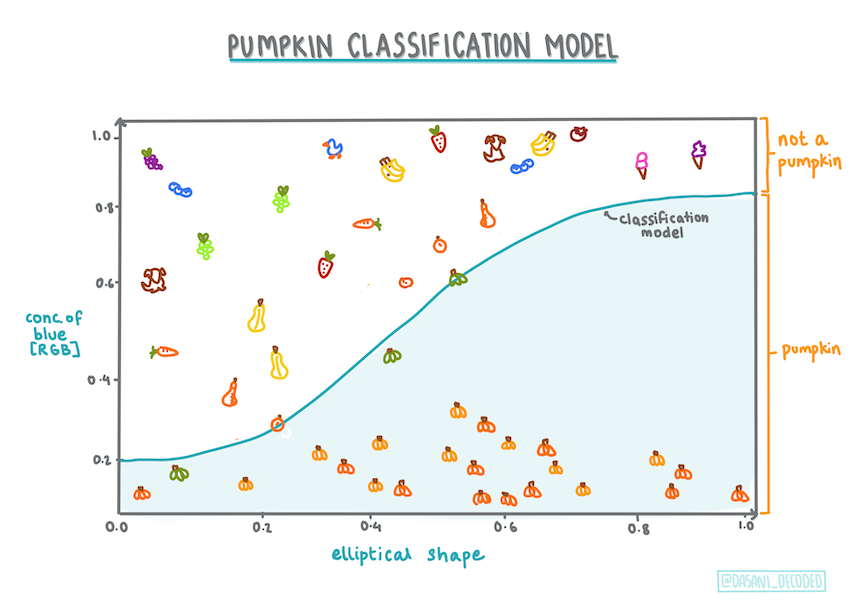
</details>

<details>
    <summary><strong>📊 MATRIZ CONFUSIÓN</strong></summary>
    <ul>
        <li>Se utiliza para evaluar el rendimiento de un modelo de clasificación, como la regresión logística.</li>
        <li>Nos muestra las predicciones correctas e incorrectas, organizadas en una tabla, para evaluar qué tan bien ha clasificado el modelo las categorías.</li>
        <li>Ejemplo de una matriz de confusión para unas pruebas de detección de spam:</li>
    </ul>
    
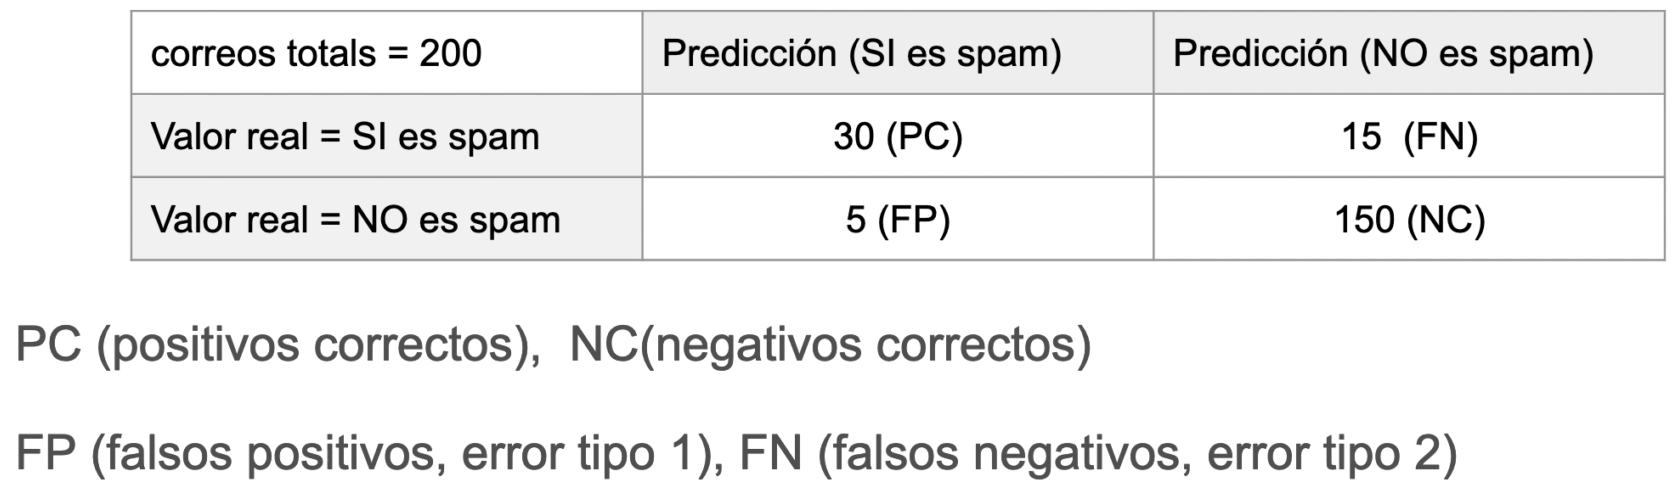
</details>

<details>
    <summary><strong>📏 PRECISIÓN & TASA ERROR</strong></summary>
    <ul>
        <li>La <strong>precisión</strong> mide la probabilidad de acierto en la predicción de un modelo:</li>
        <ul>
            <li><code>Precisión = (Positivos correctos + Negativos correctos) / Total de predicciones</code></li>
            <li><code>Precisión = (30 + 150) / 200 = 0.9 (probabilidad de acierto del 90%)</code></li>
        </ul>
        <li>La <strong>tasa de error</strong> mide la probabilidad de error en la predicción de un modelo:</li>
        <ul>
            <li><code>Tasa de error = (Falsos positivos + Falsos negativos) / Total de predicciones</code></li>
            <li><code>Tasa de error = (5 + 15) / 200 = 0.1 (probabilidad de error del 10%)</code></li>
        </ul>
    </ul>
</details>

---
## Ejemplo regresión logística
### Parte 1: Observación del dataframe

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cd ../resources/datasets

/home/aramos-m/Escritorio/IBM_AI/resources/datasets


In [8]:
entrenamiento = pd.read_csv("Titanic.csv")
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

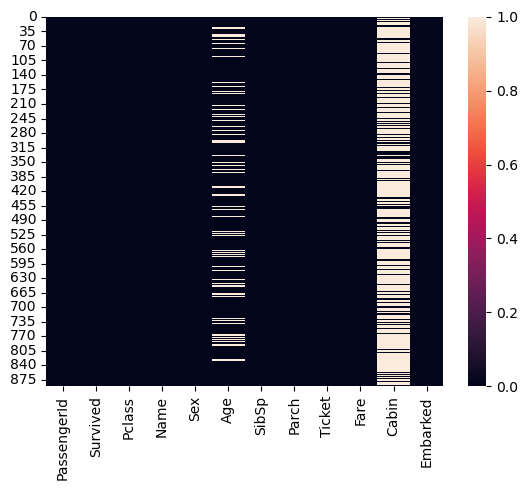

In [9]:
sns.heatmap(entrenamiento.isnull()) # Visualizar los datos de entrenamiento con valores nulos

<Axes: xlabel='Survived', ylabel='count'>

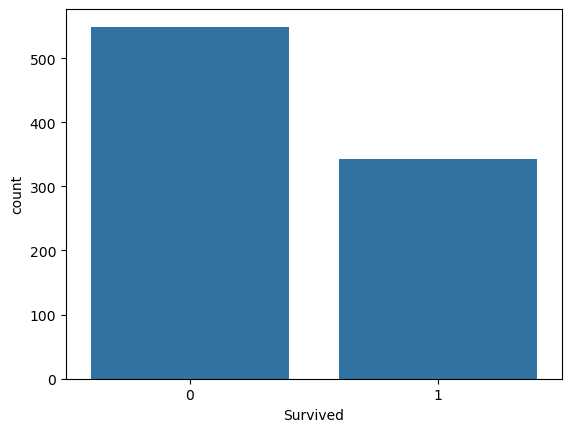

In [10]:
sns.countplot(x="Survived",data=entrenamiento)

<Axes: xlabel='Survived', ylabel='count'>

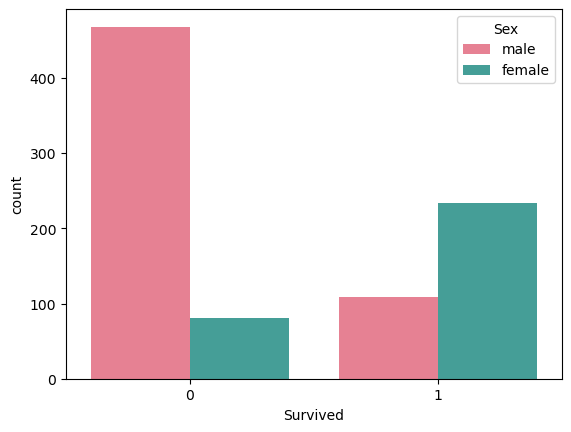

In [11]:
sns.countplot(x="Survived",data=entrenamiento,hue="Sex",palette="husl") # Supervivientes por sexo

<Axes: xlabel='Survived', ylabel='count'>

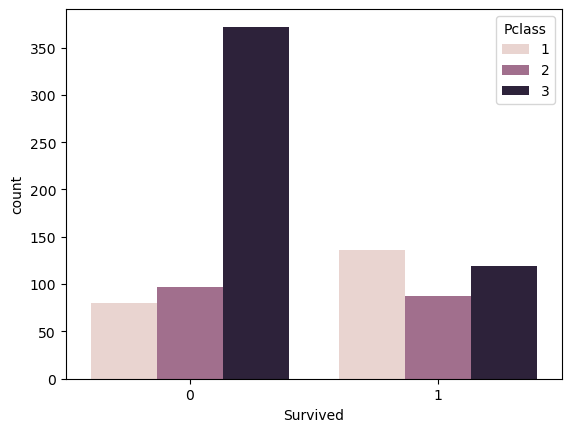

In [12]:
sns.countplot(x="Survived",data=entrenamiento,hue="Pclass") # Supervivientes por clase

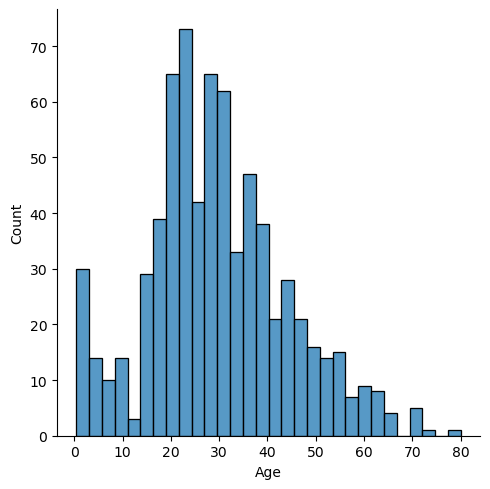

In [13]:
sns.displot(entrenamiento["Age"].dropna(), kde=False, bins=30)

<Axes: ylabel='Frequency'>

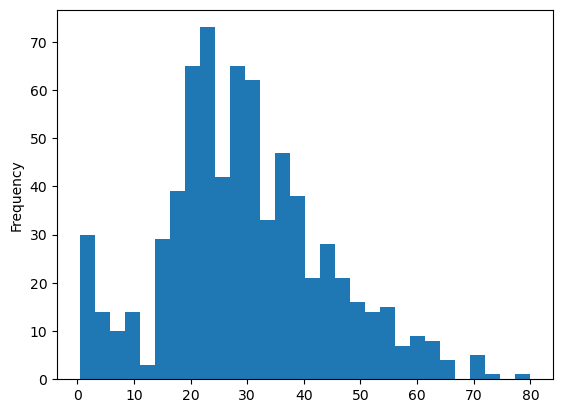

In [14]:
entrenamiento["Age"].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

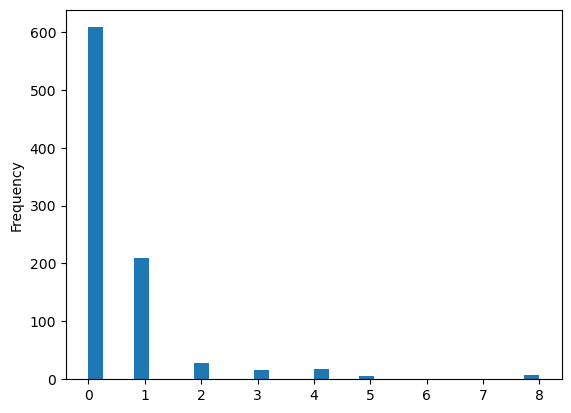

In [15]:
entrenamiento["SibSp"].plot.hist(bins=30)

In [16]:
import cufflinks as cf
cf.go_offline()

In [17]:
entrenamiento['Fare'].iplot(kind="hist",bins=40)

---
### Parte 2: Limpieza de datos

<Axes: xlabel='Pclass', ylabel='Age'>

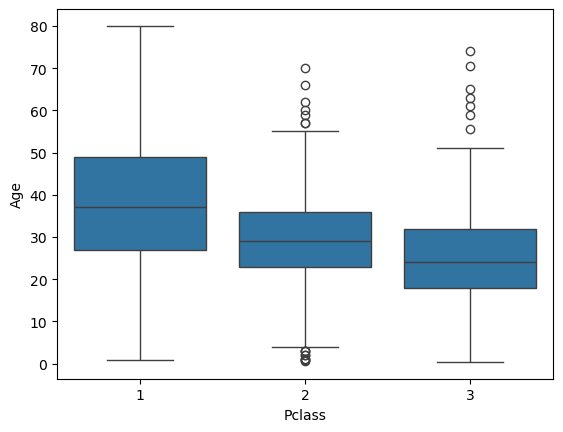

In [20]:
# Edad sustituimos por el valor medio de la edad de la clase por los valores nulos
sns.boxplot(x="Pclass",y="Age",data=entrenamiento)

In [21]:
def edad_media(columnas):
    #edad = columnas[0]
    #clase = columnas[1]
    edad = columnas.iloc[0]  # Acceder a la primera posición con iloc
    clase = columnas.iloc[1]  # Acceder a la segunda posición con iloc
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase ==2:
            return 30
        else:
            return 25
    else:
        return edad

In [22]:
entrenamiento["Age"] = entrenamiento[["Age", "Pclass"]].apply(edad_media, axis=1)

<Axes: >

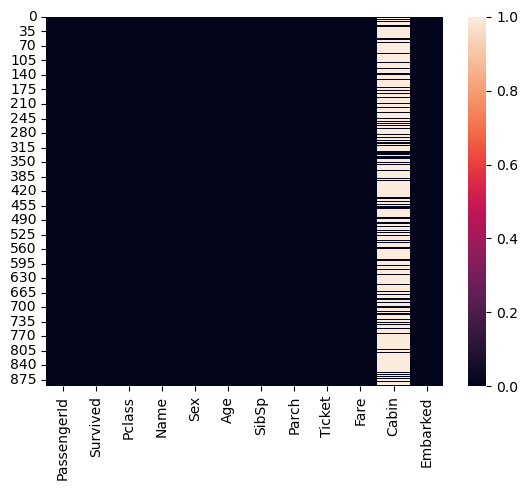

In [23]:
entrenamiento.isnull()
sns.heatmap(entrenamiento.isnull()) # Visualizar los datos de entrenamiento con valores nulos

In [24]:
# Eliminar la variable 'Cabin' porque tiene la mayoria NaN y no aporta
entrenamiento = entrenamiento.drop("Cabin",axis=1)

<Axes: >

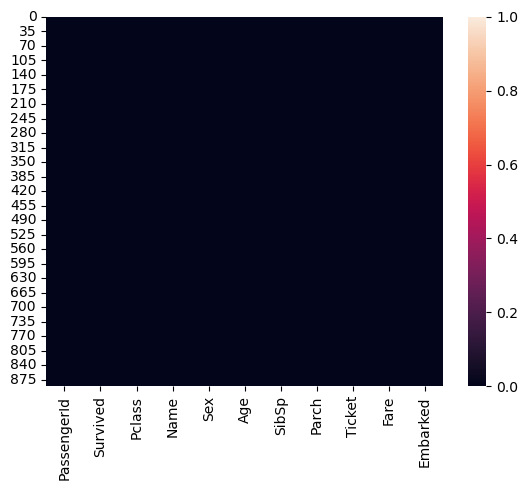

In [25]:
entrenamiento.isnull()
sns.heatmap(entrenamiento.isnull()) # Visualizar los datos de entrenamiento con valores nulos

In [26]:
entrenamiento.head() # Comprobamos de nuevo el dataset para buscar otros posibles ajustes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
# Nos quedamos con las columnas numéricas
entrenamiento = entrenamiento.drop(["Name","Ticket","PassengerId"],axis=1)

In [28]:
# Convertimos los valores de 'Sex' a 0 y 1
sexo = pd.get_dummies(entrenamiento["Sex"],drop_first=True)

In [29]:
# Añadimos la nueva columna 'sexo'
entrenamiento = pd.concat([entrenamiento, sexo], axis=1)
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [30]:
# Eliminamos la vieja columna 'Sex" que ya no necesitamos
entrenamiento = entrenamiento.drop("Sex",axis=1)
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True


In [31]:
# Hacemos los mismo con 'Embarked'
puerto = pd.get_dummies(entrenamiento["Embarked"],drop_first=True)
puerto

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [32]:
entrenamiento = pd.concat([entrenamiento, puerto], axis=1)
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,True,False,True
1,1,1,38.0,1,0,71.2833,C,False,False,False
2,1,3,26.0,0,0,7.9250,S,False,False,True
3,1,1,35.0,1,0,53.1000,S,False,False,True
4,0,3,35.0,0,0,8.0500,S,True,False,True


In [33]:
entrenamiento = entrenamiento.drop("Embarked",axis=1)
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


---
### Parte 3: Entrenamiento del modelo

In [80]:
y = entrenamiento["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [82]:
X = entrenamiento.drop("Survived", axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [114]:
from sklearn.linear_model import LogisticRegression

In [120]:
# max_iter=1000 le da al modelo más intentos para encontrar una solución estable
modelo = LogisticRegression(max_iter=1000) 
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [124]:
predicciones = modelo.predict(X_test) # ¿Sobrevive=1 or No sobrevive=0?
predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [126]:
y_test

248    1
197    0
133    1
169    0
736    0
      ..
422    0
815    0
466    0
559    1
6      0
Name: Survived, Length: 268, dtype: int64

In [128]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.73      0.78      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.83      0.83       268



In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[152,  26],
       [ 20,  70]])